In [1]:
from sea_breeze import load_model_data, sea_breeze_funcs, sea_breeze_filters, utils
from dask.distributed import Client
from dask.distributed import progress
import xarray as xr
import pandas as pd
import numpy as np
import os
import argparse
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy

In [2]:
client = Client()

2025-02-13 13:35:10,059 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2025-02-13 13:35:10,063 - distributed.utils - INFO - Reload module schedplugin from .py file
2025-02-13 13:35:10,066 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42325 instead
  warnings.warn(


Modifying workers


In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-bdw-0159.gadi.nci.org.au/9509/proxy/42325/status,
Dashboard: /node/gadi-cpu-bdw-0159.gadi.nci.org.au/9509/proxy/42325/status,Workers: 14
Total threads: 14,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36667,Workers: 14
Dashboard: /node/gadi-cpu-bdw-0159.gadi.nci.org.au/9509/proxy/42325/status,Total threads: 14
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:46733,Total threads: 1
Dashboard: /node/gadi-cpu-bdw-0159.gadi.nci.org.au/9509/proxy/46023/status,Memory: 0 B
Nanny: tcp://127.0.0.1:44701,


In [4]:
lat_slice, lon_slice = utils.get_perth_large_bounds()

In [5]:
t1 = "2016-01-06 06:00"
t2 = "2016-01-06 06:00"
# lat_slice = slice(-45.7,-6.9)
# lon_slice = slice(108,158.5)

In [6]:
chunks = {"time":1,"lat":-1,"lon":-1,"lev":-1}

In [7]:
orog, lsm = load_model_data.load_aus2200_static(
    "mjo-elnino",
    lon_slice,
    lat_slice)

In [8]:
hgt_slice = slice(0,5000)

aus2200_ua = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "ua",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "1hr",
        chunks=chunks,
        staggered="lon",
        hgt_slice=hgt_slice,
        interp_hgts=True,
        smooth=False),
          "1hr")

aus2200_ua_smooth2 = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "ua",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "1hr",
        chunks=chunks,
        staggered="lon",
        hgt_slice=hgt_slice,
        smooth=True,
        smooth_axes=("lat","lon","lev"),
        sigma=2,
        interp_hgts=True),
          "1hr")

aus2200_va = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "va",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "1hr",
        chunks=chunks,
        staggered="lat",
        hgt_slice=hgt_slice,
        interp_hgts=True,
        smooth=False),
          "1hr")

aus2200_va_smooth2 = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "va",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "1hr",
        chunks=chunks,
        staggered="lat",
        hgt_slice=hgt_slice,
        smooth=True,
        smooth_axes=("lat","lon","lev"),
        sigma=2,
        interp_hgts=True),
          "1hr")

In [9]:
# aus2200_va.sel(lat=-16,lon=132,method="nearest").isel(time=-1).plot(y="lev",marker="o")
# aus2200_va_smooth.sel(lat=-16,lon=132,method="nearest").isel(time=-1).plot(y="lev",marker="o")

# plt.figure()
# aus2200_va.sel(lat=-16,lon=132,lev=0,method="nearest").plot(x="time",marker="o")
# aus2200_va_smooth.sel(lat=-16,lon=132,lev=0,method="nearest").plot(x="time",marker="o")

# plt.figure()
# aus2200_va.isel(lev=0,time=-1).plot()
# plt.figure()
# aus2200_va_smooth.isel(lev=0,time=-1).plot()

In [10]:
# vprime, uprime = sea_breeze_funcs.rotate_wind(aus2200_ua,aus2200_va,angle_ds["angle_interp"])
# vprime_smoothlev, uprime_smoothlev = sea_breeze_funcs.rotate_wind(aus2200_ua_smoothlev,aus2200_va_smoothlev,angle_ds["angle_interp"])
# vprime_smoothall, uprime_smoothall = sea_breeze_funcs.rotate_wind(aus2200_ua_smoothall,aus2200_va_smoothall,angle_ds_smooth4["angle_interp"])
# vprime.sel(lat=-16,lon=132,method="nearest").isel(time=-1).plot(y="lev")
# vprime_smoothall.sel(lat=-16,lon=132,method="nearest").isel(time=-1).plot(y="lev")
# vprime_smoothlev.sel(lat=-16,lon=132,method="nearest").isel(time=-1).plot(y="lev")

# plt.gca().axhline(aus2200_zmla.sel(lat=-16,lon=132,method="nearest").isel(time=-1).values)

In [11]:
# plt.figure(figsize=[12,4])
# plt.subplot(1,2,1)
# aus2200_ua.isel(time=0,lat=10,lon=10).plot(y="lev")
# plt.subplot(1,2,2)
# aus2200_ua_smooth4.isel(time=0,lat=10,lon=10).plot(y="lev")

In [12]:
# hgt_slice = slice(0,5000)

# aus2200_vas_smooth4 = load_model_data.round_times(
#     load_model_data.load_aus2200_variable(
#         "vas",
#         t1,
#         t2,
#         "mjo-elnino",
#         lon_slice,
#         lat_slice,
#         "10min",
#         chunks=chunks,
#         staggered="lat",
#         smooth=True,
#         sigma=4),
#           "10min")
# aus2200_uas_smooth4 = load_model_data.round_times(
#     load_model_data.load_aus2200_variable(
#         "uas",
#         t1,
#         t2,
#         "mjo-elnino",
#         lon_slice,
#         lat_slice,
#         "10min",
#         chunks=chunks,
#         staggered="lon",
#         smooth=True,
#         sigma=4),
#           "10min")
# aus2200_hus_smooth4 = load_model_data.round_times(
#     load_model_data.load_aus2200_variable(
#         "hus",
#         t1,
#         t2,
#         "mjo-elnino",
#         lon_slice,
#         lat_slice,
#         "10min",
#         chunks=chunks,
#         smooth=True,
#         sigma=4),
#           "10min")
# aus2200_va_smooth4 = load_model_data.round_times(
#     load_model_data.load_aus2200_variable(
#         "va",
#         t1,
#         t2,
#         "mjo-elnino",
#         lon_slice,
#         lat_slice,
#         "1hr",
#         chunks=chunks,
#         staggered="lat",
#         hgt_slice=hgt_slice,
#         smooth=True,
#         sigma=4),
#           "1hr")
# aus2200_ua_smooth4 = load_model_data.round_times(
#     load_model_data.load_aus2200_variable(
#         "ua",
#         t1,
#         t2,
#         "mjo-elnino",
#         lon_slice,
#         lat_slice,
#         "1hr",
#         chunks=chunks,
#         staggered="lon",
#         hgt_slice=hgt_slice,
#         smooth=True,
#         sigma=4),
#           "1hr")
# aus2200_zmla_smooth4 = load_model_data.round_times(
#     load_model_data.load_aus2200_variable(
#         "zmla",
#         t1,
#         t2,
#         "mjo-elnino",
#         lon_slice,
#         lat_slice,
#         "1hr",
#         chunks=chunks,
#         staggered="time",
#         smooth=True,
#         sigma=4),
#           "1hr")
# aus2200_tas_smooth4 = load_model_data.round_times(
#         load_model_data.load_aus2200_variable(
#             "tas",
#             t1,
#             t2,
#             "mjo-elnino",
#             lon_slice,
#             lat_slice,
#             "10min",
#             chunks=chunks,
#             smooth=True,
#             sigma=4),
#             "10min") 
# angle_ds_smooth4 = load_model_data.get_coastline_angle_kernel(
#     lsm,
#     compute=False,
#     lat_slice=lat_slice,
#     lon_slice=lon_slice,
#     path_to_load="/g/data/gb02/ab4502/coastline_data/aus2200.nc",
#     smooth=True,
#     sigma=4)

# #Just do the hourly data
# aus2200_vas_smooth4 = aus2200_vas_smooth4.sel(time=aus2200_vas_smooth4.time.dt.minute==0)
# aus2200_uas_smooth4 = aus2200_uas_smooth4.sel(time=aus2200_uas_smooth4.time.dt.minute==0)
# aus2200_hus_smooth4 = aus2200_hus_smooth4.sel(time=aus2200_hus_smooth4.time.dt.minute==0)
# aus2200_tas_smooth4 = aus2200_tas_smooth4.sel(time=aus2200_tas_smooth4.time.dt.minute==0)

In [13]:
aus2200_vas_smooth2 = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "vas",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "10min",
        chunks=chunks,
        staggered="lat",
        smooth=True,
        sigma=2),
          "10min")
aus2200_uas_smooth2 = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "uas",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "10min",
        chunks=chunks,
        staggered="lon",
        smooth=True,
        sigma=2),
          "10min")
aus2200_hus_smooth2 = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "hus",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "10min",
        chunks=chunks,
        smooth=True,
        sigma=2),
          "10min")
aus2200_zmla_smooth2 = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "zmla",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "1hr",
        chunks=chunks,
        staggered="time",
        smooth=True,
        sigma=2),
          "1hr")
aus2200_tas_smooth2 = load_model_data.round_times(
        load_model_data.load_aus2200_variable(
            "tas",
            t1,
            t2,
            "mjo-elnino",
            lon_slice,
            lat_slice,
            "10min",
            chunks=chunks,
            smooth=True,
            sigma=2),
            "10min") 
angle_ds_smooth2 = load_model_data.get_coastline_angle_kernel(
    lsm,
    compute=False,
    lat_slice=lat_slice,
    lon_slice=lon_slice,
    path_to_load="/g/data/gb02/ab4502/coastline_data/aus2200.nc",
    smooth=True,
    sigma=2)

#Just do the hourly data
aus2200_vas_smooth2 = aus2200_vas_smooth2.sel(time=aus2200_vas_smooth2.time.dt.minute==0)
aus2200_uas_smooth2 = aus2200_uas_smooth2.sel(time=aus2200_uas_smooth2.time.dt.minute==0)
aus2200_hus_smooth2 = aus2200_hus_smooth2.sel(time=aus2200_hus_smooth2.time.dt.minute==0)
aus2200_tas_smooth2 = aus2200_tas_smooth2.sel(time=aus2200_tas_smooth2.time.dt.minute==0)

In [14]:
aus2200_vas = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "vas",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "10min",
        chunks=chunks,
        staggered="lat",
        smooth=False,
        sigma=2),
          "10min")
aus2200_uas = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "uas",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "10min",
        chunks=chunks,
        staggered="lon",
        smooth=False,
        sigma=2),
          "10min")
aus2200_hus = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "hus",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "10min",
        chunks=chunks,
        smooth=False,
        sigma=2),
          "10min")
aus2200_zmla = load_model_data.round_times(
    load_model_data.load_aus2200_variable(
        "zmla",
        t1,
        t2,
        "mjo-elnino",
        lon_slice,
        lat_slice,
        "1hr",
        chunks=chunks,
        staggered="time"),
          "1hr")
aus2200_tas = load_model_data.round_times(
        load_model_data.load_aus2200_variable(
            "tas",
            t1,
            t2,
            "mjo-elnino",
            lon_slice,
            lat_slice,
            "10min",
            chunks=chunks),
            "10min")    
angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    compute=False,
    lat_slice=lat_slice,
    lon_slice=lon_slice,
    path_to_load="/g/data/gb02/ab4502/coastline_data/aus2200.nc",
    smooth=False,
    sigma=2)

#Just do the hourly data
aus2200_vas = aus2200_vas.sel(time=aus2200_vas.time.dt.minute==0)
aus2200_uas = aus2200_uas.sel(time=aus2200_uas.time.dt.minute==0)
aus2200_hus = aus2200_hus.sel(time=aus2200_hus.time.dt.minute==0)
aus2200_tas = aus2200_tas.sel(time=aus2200_tas.time.dt.minute==0)

In [15]:
# in1 = aus2200_hus.sel(time=t).values

# conv_filter = np.zeros((3,3))
# conv_filter[1,1] = 1/2
# conv_filter[0,1] = 1/8
# conv_filter[1,0] = 1/8
# conv_filter[2,1] = 1/8
# conv_filter[1,2] = 1/8
# conv_filter

# N = 100
# for N in range(N):
#     in1 = scipy.signal.convolve(in1,conv_filter,mode="same")

# plt.pcolormesh(in1[1:,1:],vmin=0.008, vmax=0.015); plt.colorbar()

In [16]:
# in1 = aus2200_hus.sel(time=t).values

# plt.pcolormesh(scipy.ndimage.uniform_filter(in1,20),vmin=0.008, vmax=0.015); plt.colorbar()

In [17]:
# in1 = aus2200_hus.sel(time=t).values

# plt.pcolormesh(scipy.ndimage.gaussian_filter(in1,5),vmin=0.008, vmax=0.015); plt.colorbar()

In [18]:
Fc_smooth2 = sea_breeze_funcs.coast_relative_frontogenesis(
        aus2200_hus_smooth2,
        aus2200_uas_smooth2,
        aus2200_vas_smooth2,
        angle_ds_smooth2["angle_interp"]
    )

# Fc_smooth4 = sea_breeze_funcs.coast_relative_frontogenesis(
#         aus2200_hus_smooth4,
#         aus2200_uas_smooth4,
#         aus2200_vas_smooth4,
#         angle_ds_smooth4["angle_interp"]
#     )

Fc = sea_breeze_funcs.coast_relative_frontogenesis(
        aus2200_hus,
        aus2200_uas,
        aus2200_vas,
        angle_ds["angle_interp"]
    )

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 12.47 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 12.50 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


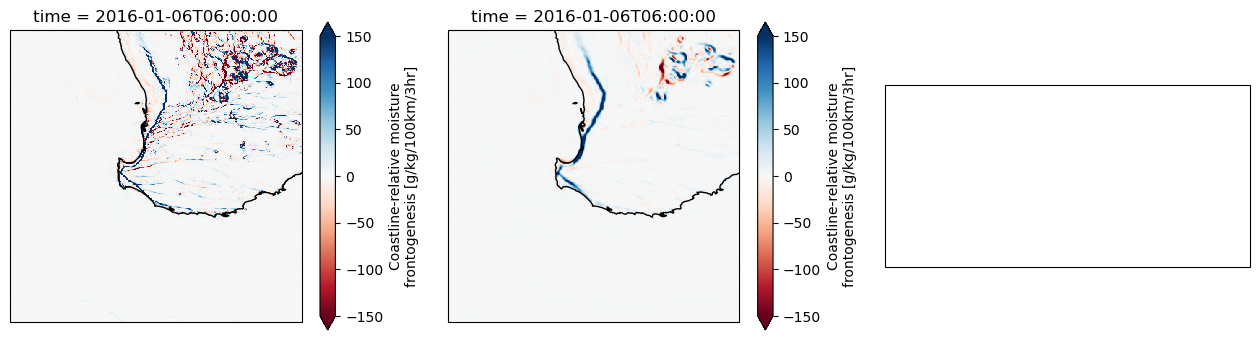

In [19]:
plt.figure(figsize=[16,4])

ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())
Fc.Fc.isel(time=-1).plot(cmap="RdBu",vmin=-150,vmax=150)
ax.coastlines()

ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())
Fc_smooth2.Fc.isel(time=-1).plot(cmap="RdBu",vmin=-150,vmax=150)
ax.coastlines()

ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())
#Fc_smooth4.Fc.isel(time=-1).plot(cmap="RdBu",vmin=-100,vmax=100)
#ax.coastlines()

In [20]:
F_smooth2 = sea_breeze_funcs.kinematic_frontogenesis(
        aus2200_hus_smooth2,
        aus2200_uas_smooth2,
        aus2200_vas_smooth2)

# F_smooth4 = sea_breeze_funcs.kinematic_frontogenesis(
#         aus2200_hus_smooth4,
#         aus2200_uas_smooth4,
#         aus2200_vas_smooth4)

F = sea_breeze_funcs.kinematic_frontogenesis(
        aus2200_hus,
        aus2200_uas,
        aus2200_vas)

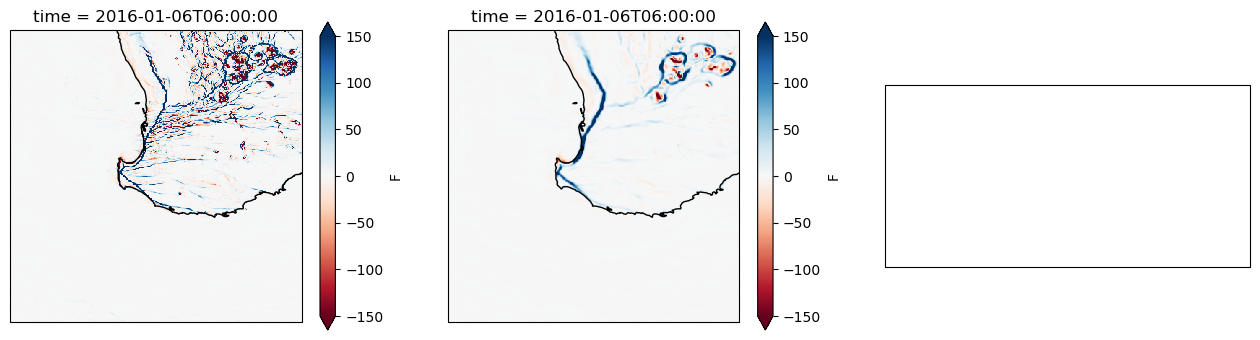

In [21]:
plt.figure(figsize=[16,4])

ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())
F.F.isel(time=-1).plot(cmap="RdBu",vmin=-150,vmax=150)
ax.coastlines()

ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())
F_smooth2.F.isel(time=-1).plot(cmap="RdBu",vmin=-150,vmax=150)
ax.coastlines()

ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())
#F_smooth4.F.isel(time=-1).plot(cmap="RdBu",vmin=-100,vmax=100)
#ax.coastlines()

In [23]:
sbi = sea_breeze_funcs.calc_sbi(xr.Dataset({"u":aus2200_ua,"v":aus2200_va}),
                            angle_ds["angle_interp"],
                            subtract_mean=False,
                            height_method="blh",
                            blh_da=aus2200_zmla,
                            height_mean=False,
                            vert_coord="lev",
                            alpha_height=100)

sbi_smooth2 = sea_breeze_funcs.calc_sbi(xr.Dataset({"u":aus2200_ua_smooth2,"v":aus2200_va_smooth2}),
                            angle_ds_smooth2["angle_interp"],
                            subtract_mean=False,
                            height_method="blh",
                            blh_da=aus2200_zmla_smooth2,
                            height_mean=False,
                            vert_coord="lev",
                            alpha_height=100)

# sbi_smooth4 = sea_breeze_funcs.calc_sbi(xr.Dataset({"u":aus2200_ua_smooth4,"v":aus2200_va_smooth4}),
#                             angle_ds_smooth4["angle_interp"],
#                             subtract_mean=False,
#                             height_method="blh",
#                             blh_da=aus2200_zmla_smooth4,
#                             height_mean=False,
#                             vert_coord="lev")

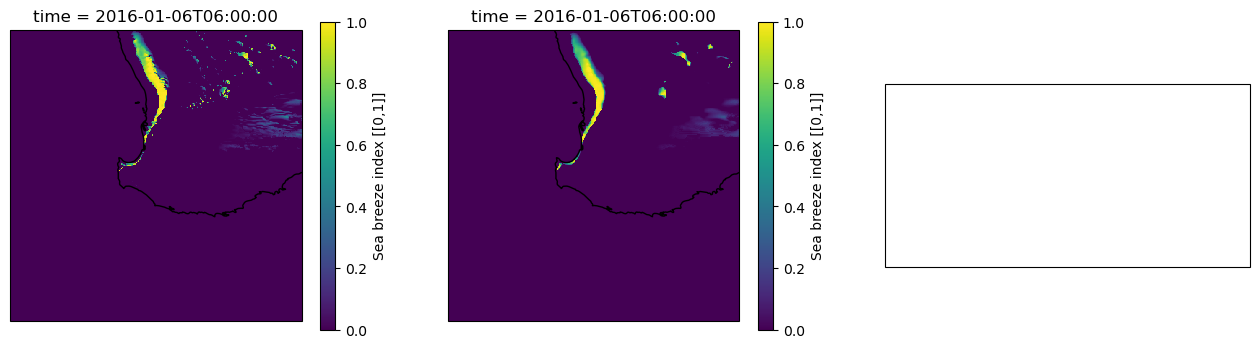

In [24]:
plt.figure(figsize=[16,4])

ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())
sbi.sbi.isel(time=-1).plot(vmin=0,vmax=1)
ax.coastlines()

ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())
sbi_smooth2.sbi.isel(time=-1).plot(vmin=0,vmax=1)
ax.coastlines()

ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())
#sbi_smooth4.sbi.isel(time=-1).plot(vmin=0,vmax=1)
#ax.coastlines()

In [25]:
F_hourly = sea_breeze_funcs.hourly_change(
        aus2200_hus,
        aus2200_tas,
        aus2200_uas,
        aus2200_vas,
        angle_ds["angle_interp"],
        lat_chunk=-1,
        lon_chunk=-1
    )    

F_hourly_smooth2 = sea_breeze_funcs.hourly_change(
        aus2200_hus_smooth2,
        aus2200_tas_smooth2,
        aus2200_uas_smooth2,
        aus2200_vas_smooth2,
        angle_ds_smooth2["angle_interp"],
        lat_chunk=-1,
        lon_chunk=-1
    )    

# F_hourly_smooth4 = sea_breeze_funcs.hourly_change(
#         aus2200_hus_smooth4,
#         aus2200_tas_smooth4,
#         aus2200_uas_smooth4,
#         aus2200_vas_smooth4,
#         angle_ds_smooth4["angle_interp"],
#         lat_chunk=-1,
#         lon_chunk=-1
#     )    

fuzzy = sea_breeze_funcs.fuzzy_function_combine(
    F_hourly["wind_change"],
    F_hourly["q_change"],
    F_hourly["t_change"],
    combine_method="mean")

fuzzy_smooth2 = sea_breeze_funcs.fuzzy_function_combine(
    F_hourly_smooth2["wind_change"],
    F_hourly_smooth2["q_change"],
    F_hourly_smooth2["t_change"],
    combine_method="mean")

# fuzzy_smooth4 = sea_breeze_funcs.fuzzy_function_combine(
#     F_hourly_smooth4["wind_change"],
#     F_hourly_smooth4["q_change"],
#     F_hourly_smooth4["t_change"],
#     combine_method="mean")

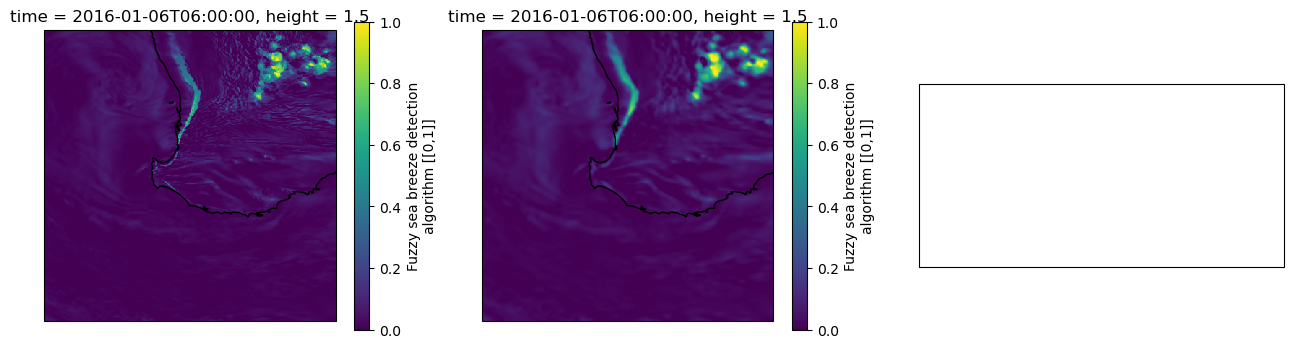

In [26]:
plt.figure(figsize=[16,4])

ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())
fuzzy.isel(time=-1).plot(vmin=0,vmax=1)
ax.coastlines()

ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())
fuzzy_smooth2.isel(time=-1).plot(vmin=0,vmax=1)
ax.coastlines()

ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())
#fuzzy_smooth4.isel(time=-1).plot(vmin=0,vmax=1)
#ax.coastlines()

In [6]:
#Load BARRA-C model level winds, BLH and static info
chunks = {"time":1,"lat":-1,"lon":-1}
orog, lsm = load_model_data.load_barra_static(
    "AUST-04",
    lon_slice,
    lat_slice)
vas = load_model_data.load_barra_variable(
        "vas",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks)
uas = load_model_data.load_barra_variable(
        "uas",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks)
huss = load_model_data.load_barra_variable(
        "huss",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks)
tas = load_model_data.load_barra_variable(
        "tas",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks)     
angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    compute=False,
    lat_slice=lat_slice,
    lon_slice=lon_slice,
    path_to_load="/g/data/gb02/ab4502/coastline_data/barra_c.nc")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [7]:
s=2
uas_smooth = load_model_data.load_barra_variable(
        "uas",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks,
        smooth=True,
        sigma=s)

vas_smooth = load_model_data.load_barra_variable(
        "vas",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks,
        smooth=True,
        sigma=s)

uas_smooth = load_model_data.load_barra_variable(
        "uas",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks,
        smooth=True,
        sigma=s)

huss_smooth = load_model_data.load_barra_variable(
        "huss",
        t1,
        t2,
        "AUST-04",
        "1hr",
        lat_slice,
        lon_slice,
        chunks=chunks,
        smooth=True,
        sigma=s)

angle_ds_smooth = load_model_data.get_coastline_angle_kernel(
    lsm,
    compute=False,
    lat_slice=lat_slice,
    lon_slice=lon_slice,
    path_to_load="/g/data/gb02/ab4502/coastline_data/barra_c.nc",
    smooth=True,
    sigma=s)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

In [8]:
Fc = sea_breeze_funcs.coast_relative_frontogenesis(
        huss,
        uas,
        vas,
        angle_ds["angle_interp"]
    )

Fc_smooth = sea_breeze_funcs.coast_relative_frontogenesis(
        huss_smooth,
        uas_smooth,
        vas_smooth,
        angle_ds_smooth["angle_interp"]
    )

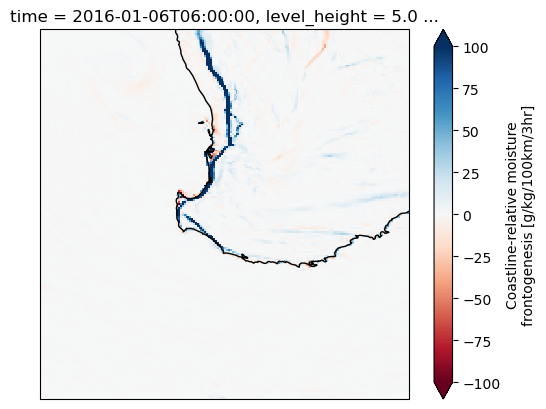

In [9]:
ax=plt.axes(projection=ccrs.PlateCarree())
Fc.Fc.isel(time=-1).plot(cmap="RdBu",vmin=-100,vmax=100)
ax.coastlines()

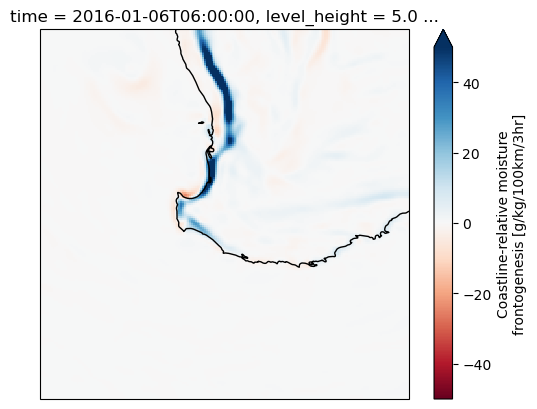

In [10]:
ax=plt.axes(projection=ccrs.PlateCarree())
Fc_smooth.Fc.isel(time=-1).plot(cmap="RdBu",vmin=-50,vmax=50)
ax.coastlines()